In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load the data
from google.colab import files
uploaded = files.upload()


Saving TSLA.csv to TSLA.csv


In [4]:
#Store the data
df = pd.read_csv('TSLA.csv')
df = df.set_index(pd.DatetimeIndex(df['Date']))
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2020-01-28,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


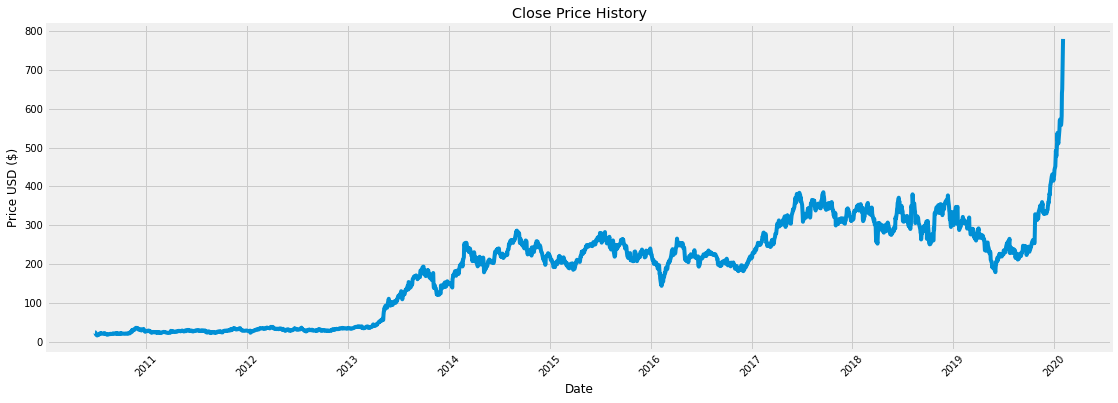

In [11]:
#Visualize the Stock Price
plt.figure(figsize = (17, 6))
plt.plot(df['Close'], label = 'Close')
plt.xticks(rotation = 45)
plt.title("Close Price History")
plt.xlabel('Date')
plt.ylabel("Price USD ($)")
plt.show()

In [12]:
#Calculate the MACD and signal line
#Calculate the short term exponential moving average (EMA)
ShortEMA = df.Close.ewm(span=12, adjust = False).mean()
#Calculate the long term exponential moving average (EMA)
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
#Calculate the MACD Line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span = 9, adjust=False).mean()



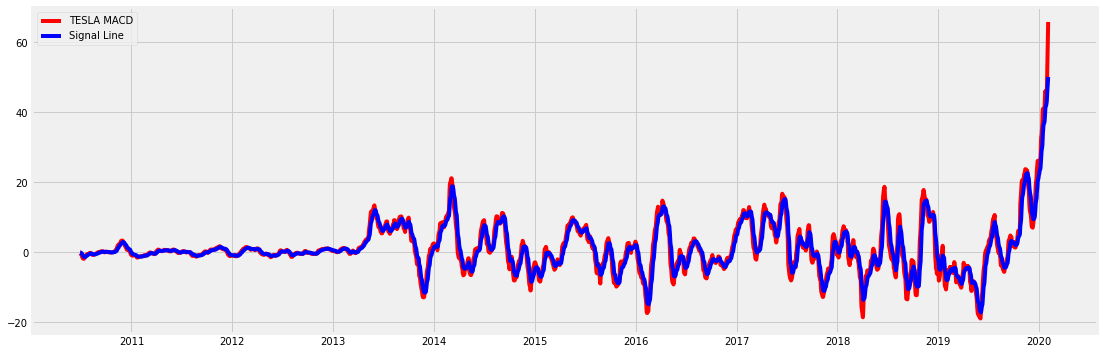

In [14]:
#plot the figure
plt.figure(figsize=(17,6))
plt.plot(df.index, MACD, label = 'TESLA MACD', color = 'red')
plt.plot(df.index, signal, label='Signal Line', color = 'blue')
plt.legend(loc = 'upper left')
plt.show()

In [15]:
#Create new columns for new data
df['MACD'] = MACD
df['Signal Line'] = signal

df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,,
2010-06-29,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,0.000000,0.000000
2010-06-30,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,-0.004786,-0.000957
2010-07-01,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,-0.157655,-0.032297
2010-07-02,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,-0.495799,-0.124997
2010-07-06,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,-1.001572,-0.300312
...,...,...,...,...,...,...,...,...,...
2020-01-28,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,44.844805,42.681788
2020-01-29,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,45.090134,43.163457
2020-01-30,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,49.540463,44.438858


In [16]:
#Create a signal to when to buy and sell an assert
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return (Buy, Sell)

In [17]:
#Create buy and sell column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [18]:
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,
2010-06-29,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,0.000000,0.000000,NaN,NaN
2010-06-30,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,-0.004786,-0.000957,NaN,23.83
2010-07-01,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,-0.157655,-0.032297,NaN,NaN
2010-07-02,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,-0.495799,-0.124997,NaN,NaN
2010-07-06,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,-1.001572,-0.300312,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-28,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,44.844805,42.681788,NaN,NaN
2020-01-29,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,45.090134,43.163457,NaN,NaN
2020-01-30,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,49.540463,44.438858,NaN,NaN


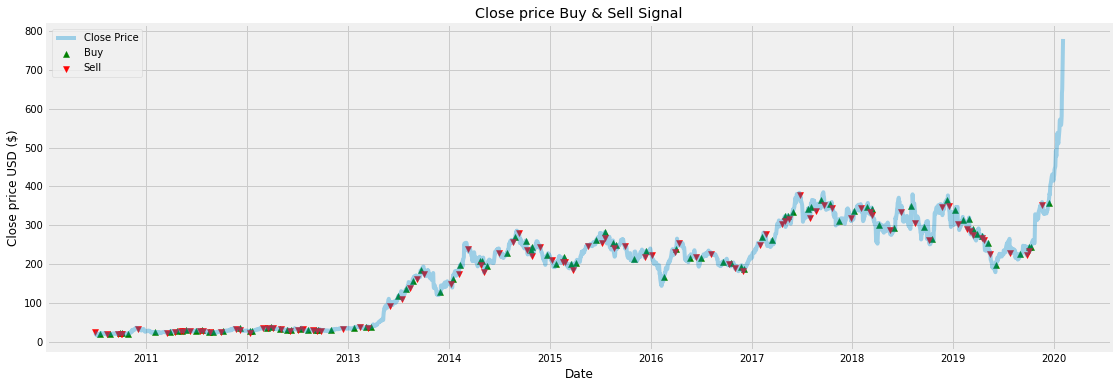

In [21]:
#Visualize the buy and sell signal

plt.figure(figsize=(17,6))
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close price Buy & Sell Signal')
plt.xlabel("Date")
plt.ylabel("Close price USD ($)")
plt.legend(loc='upper left')
plt.show()